# Welcome to NLP Labs WiSe 17-18

In [1]:
## Environment configuration

1. Python
2. NLTK http://www.nltk.org/install.html
3. Jupyter https://jupyter.org/ 
4. Anaconda https://www.anaconda.com/download

use symbols to express math: $$y = x^2$$

# Saad Khan  Matrk Nummer - 3010290

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag

# maybe you need to download NLTK data
#nltk.download('all')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [ ]:
tokens = word_tokenize("Hello world, lets do something awesome today!")

In [ ]:
print(pos_tag(tokens))

## Loading Penn TreeBank (PTB) X1 & Tiger Corpus X2

In [ ]:
#nltk.download('treebank')

annotated_sent = nltk.corpus.treebank.tagged_sents()
print(annotated_sent[0])
print("Tagged sentences: ", len(annotated_sent))
print("Tagged words:", len(nltk.corpus.treebank.tagged_words()))
#1 for English, 2 for German
#seperation(annotated_sent)
# tagsets
#nltk.download('tagsets')
#print(nltk.help.upenn_tagset())

#loading german corpus 
corp = nltk.corpus.ConllCorpusReader('.', 'tiger_release_aug07.corrected.16012013.conll09',
                                     ['ignore', 'words', 'ignore', 'ignore', 'pos'],
                                     encoding='utf-8')
german_tagged_sents = corp.tagged_sents()
#seperation(german_tagged_sents)
print("German Tagged sentences: ", len(german_tagged_sents))

## Training

In [ ]:
# TODO: improve this feature extraction function
    
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'suffix-1': sentence[index][-1],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1]
    }
def improved_features(sentence, index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'suffix-3': sentence[index][-3:],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:],
        #'is_punctuation_mark' : '!' or '?' or '.' or ';' in sentence[index]
    }
import pprint 
pprint.pprint(features(['This', 'is', 'a', 'sentence'], 2))
#print()
#
pprint.pprint(improved_features(['This', 'is', 'a', 'sentence'], 2))

In [ ]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [ ]:
def seperation(annotated_sent):
    cutoff = int(.80 * len(annotated_sent))
    training_sentences = annotated_sent[:cutoff]
    test_sentences = annotated_sent[cutoff:]
 
    #print(len(training_sentences))
    #print(len(test_sentences))
    return training_sentences,test_sentences


# Implementing a classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.classify import MaxentClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
import pickle

def english_models():
    size=10000
    # training RandomForestClassifier
    model1 = Pipeline([
        ('vectorizer', DictVectorizer(sparse=False)),
        ('classifier', RandomForestClassifier())
    ])
    
    model1.fit(X[:size], y[:size]) 
   
    print("Accuracy of RForest - English:", scores[0]) #model 1 score

    #Training DT Classifier both classifiers using same dataset
    clf = Pipeline([
        ('vectorizer', DictVectorizer(sparse=False)),
        ('classifier', DecisionTreeClassifier(criterion= 'entropy'))
    ])
    clf.fit(X[:size], y[:size])

    print('training Da Done')

    #X_test, y_test = transform_to_dataset(test_sentences)

    print("Accuracy of DT - English:", clf.score(X_test, y_test))

    #Saving model to disk
    pickle.dump(clf, open('DT_model.sav', 'wb'))
    pickle.dump(model1, open('model1.sav', 'wb'))
    
    #Maxent Classifier
    
    #algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
    #maxent_clf = nltk.MaxentClassifier.train(X, algorithm,max_iter=3)
    #maxent_clf.show_most_informative_features(10)
    return clf,model1


In [ ]:
def german_model():
    size=10000
    test_size = 1000
    
    # training RandomForestClassifier
    model4 = Pipeline([
        ('vectorizer', DictVectorizer(sparse=False)),
        ('classifier', DecisionTreeClassifier(criterion= 'entropy'))
    ])
   #print('Length of G test ', len(G_test_sentences))
    model4.fit(G_x[:size], G_y[:size]) 
    # X_test, y_test = transform_to_dataset(G_test_sentences[:test_size])
    #m4score = model4.score(X_test, y_test)
    #print("Accuracy of DT - German:", m4score) #model 4 score
    pickle.dump(model4, open('model4.sav', 'wb'))
    return model4

In [64]:
def transform_to_dataset(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y
training_sentences,test_sentences = seperation(annotated_sent)
X, y = transform_to_dataset(training_sentences)

#For German language

G_training_sentences,G_test_sentences = seperation(german_tagged_sents)
print(len(G_training_sentences))
G_x,G_y = transform_to_dataset(G_training_sentences)

#German and English Language Models
clf, model1 = english_models()
model4 = german_model()

print()

40377
Accuracy of RForest - English: 0.877239383203
training Da Done
Accuracy of DT - English: 0.881531014522
Accuracy of DT - German: 0.833909574468



# Using the classifier

In [ ]:
#Function call along with option just to know which classifier to use
def pos_tag(sentence,option):
    print('checking...')
    tagged_sentence = []
   # print([features(sentence, index) for index in range(len(sentence))])
    if option == 1:
        tags = clf.predict([features(sentence, index) for index in range(len(sentence))])
    else:
        tags = model1.predict([improved_features(sentence, index) for index in range(len(sentence))])
    
    return zip(sentence, tags)

#import platform
#print(platform.python_version())
#option = 1 means to call DTree Classifier and Features provided, option 2 means call RForest classifier with improved features function
print(list(pos_tag(word_tokenize('Hello world, lets do something awesome today!'),1)))
print(list(pos_tag(word_tokenize('Hello world, lets do something awesome today!'),2)))
#print(list(pos_tag(word_tokenize('Hello world, lets do something awesome today!'),3)))

## Rule-based POS taggers

1. **DefaultTagger** that simply tags everything with the same tag

2. **RegexpTagger** that applies tags according to a set of regular expressions

3. ** N-Gram** (n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the n-1 preceding token)
    - **UnigramTagger**
    - **BigramTagger**
    - **TrigramTagger**

Evaluation of Models in X1
Evaluation of Models in X2
13


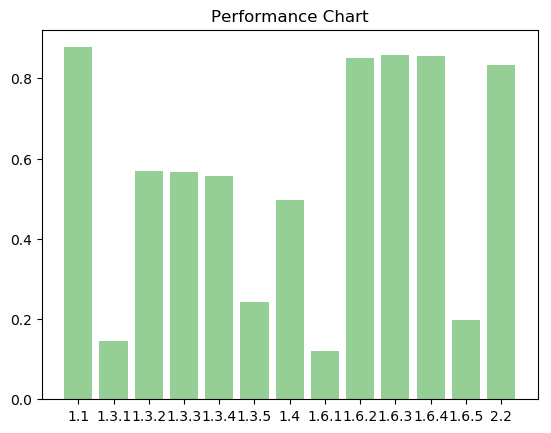

In [69]:
#nltk.download('brown')

from nltk.corpus import brown
from nltk import DefaultTagger as df
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt
from nltk import TrigramTagger as tg
import treetaggerwrapper

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 


patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
size = int(len(brown_tagged_sents) * 0.8)
#print(len(brown_tagged_sents))
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
scores = []
#X1
def_model = nltk.DefaultTagger('NN')
regexp_model = nltk.RegexpTagger(patterns)
uni_model = nltk.UnigramTagger(train_sents,backoff=regexp_model)
bi_model = nltk.BigramTagger(train_sents,backoff=uni_model)
tri_model = nltk.TrigramTagger(train_sents,backoff=bi_model)

model5 = treetaggerwrapper.TreeTagger(TAGLANG='de')
##
pickle.dump(def_model, open('model3_1.sav', 'wb'))
pickle.dump(uni_model, open('model3_2.sav', 'wb'))
pickle.dump(bi_model, open('model3_3.sav', 'wb'))
pickle.dump(regexp_model, open('model3_4.sav', 'wb'))
pickle.dump(tri_model, open('model3_5.sav', 'wb'))

size = 10000
X_test, y_test = transform_to_dataset(test_sentences)
#print('Length of test ', len(test_sentences))
scores.append(model1.score(X_test, y_test))

print("Evaluation of Models in X1")

# performance of Default Tagger
scores.append(def_model.evaluate(test_sentences)) # 1.3.1
#print(def_model.evaluate(test_sentences))
#print()

# performance of Unigram Tagger
scores.append(uni_model.evaluate(test_sentences)) # 1.3.2
#print(uni_model.evaluate(test_sentences))
#print()

# performance of Bigram Tagger
scores.append(bi_model.evaluate(test_sentences)) # 1.3.3
#print(bi_model.evaluate(test_sentences))
#print()

# performance of Trigram Tagger
scores.append(tri_model.evaluate(test_sentences)) # 1.3.4
#print(tri_model.evaluate(test_sentences))
#print()

# performance of Regex Tagger
scores.append(regexp_model.evaluate(test_sentences)) # 1.3.5
#print(regexp_model.evaluate(test_sentences))
X_test, y_test = transform_to_dataset(test_sents)
scores.append(model1.score(X_test,y_test)) #1.4

print("Evaluation of Models in X2")
# performance of Default Tagger
#print(def_model.evaluate(train_sents))
scores.append(def_model.evaluate(test_sents)) # 1.6.1
#print(def_model.evaluate(test_sents))
#print()
# performance of Unigram Tagger
#print(uni_model.evaluate(train_sents))
scores.append(uni_model.evaluate(test_sents)) # 1.6.2
#print()
# performance of Bigram Tagger
#print(bi_model.evaluate(train_sents))
scores.append(bi_model.evaluate(test_sents)) # 1.6.3
#print()
# performance of Trigram Tagger
#print(tri_model.evaluate(train_sents))
scores.append(tri_model.evaluate(test_sents)) # 1.6.4
#print()
# performance of Regex Tagger
#print(regexp_model.evaluate(train_sents))
scores.append(regexp_model.evaluate(test_sents)) # 1.6.5

X_test, y_test = transform_to_dataset(G_test_sentences[:1000])
scores.append(model4.score(X_test, y_test))
print(len(scores))

objects = ('1.1', '1.3.1', '1.3.2', '1.3.3', '1.3.4', '1.3.5', '1.4','1.6.1','1.6.2','1.6.3','1.6.4','1.6.5','2.2')
y_pos = np.arange(len(objects))

plt.xticks(y_pos, objects)
plt.bar(y_pos, scores, align='center', alpha=1)

plt.title('Performance Chart')
 
plt.show()

#plot_learning_curve(tri_model, "accuracy vs. training set size", X, y, cv=5)

## Exercise 01

# In this lab you will learn how to train your own POS tagger classifier and test it against some pre-trained models

#### Pleases implement your code and upload it to git using (jupyter notebook format)

#### Classifiers

1. ``model1`` = your POS tagger model (english)
2. ``model2`` = pre-trained POS tagger model using NLTK (maxentropy english)
3. ``model3.x`` = rule-based classifiers (x = 1 to 5)

3. ``model4`` = your POS tagger model (not english)
4. ``model5`` = pre-trained POS tagger model using RDRPOSTagger [1](http://rdrpostagger.sourceforge.net/) or TreeTagger [2](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/) (not english)

note: for ``model1`` and ``model3`` you can try different classifiers: Hidden Markov Model, Logistic Regression, Maximum Entropy Markov Models, Decision Trees, Naive Bayes, etc..**choose one**!

#### Corpora
1. ``X1`` = nltk.corpus.treebank (english)
2. ``X2`` = nltk.corpus.brown (english)
3. ``X3`` = other language (not english)

**note**: data split for training/test = 0.8/0.2 (sequencial)

#### Task 1
- get results for english (**plot a graph with all classifiers x results**)
    - ``performance 1.1`` = ``model1`` in ``X1``
    - ``performance 1.2`` = ``model2`` in ``X1``
    - ``performance 1.3.x`` = ``model3.x`` in ``X1``
    
    - ``performance 1.4`` = ``model1`` in ``X2``
    - ``performance 1.5`` = ``model2`` in ``X2``
    - ``performance 1.6.x`` = ``model3.x`` in ``X2``

#### Task 2
- train your model with standard features (**plot a graph with all classifiers x results**)
    - ``performance 2.1`` = ``model4`` in ``X3``
    - ``performance 2.2`` = ``model5`` in ``X3``

### notes:

#### 1. you can save your trained models using pickle (import pickle)
#### 2. please upload your jupyter file to git
#### 3. this script just gives a general idea, please organize and comment your code accordingly
#### 4. you have to make sure the language you choose is supported for one of the classifiers suggested (see above) AND you are able to find a corpus in that language (example: [Tiger Corpus for German](http://www.ims.uni-stuttgart.de/forschung/ressourcen/korpora/TIGERCorpus/download/start.html)). You can also search the Web in order to try to find a pre-trained classifier in your y. If that is not possible, just choose one existing. Please also make sure the language you have choosen _does not_ overlap with other students.
#### 5. If you are able to find an annotated corpus and format is CoNLL, you can easly read it using the following method in NLTK:
```corp = nltk.corpus.ConllCorpusReader()```
#### 6. a nice library to create charts: https://plot.ly/python/bar-charts/